# Model regresji liniowej w scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Zadanie 1
Wczytaj zbiór `Carseats`, który zawierają dane o sprzedaży fotelików samochodowych pewnej firmy w 400 różnych lokalizacjach:

a) dopasuj model regresji liniowej `Sales~Price`;

b) dopasuj model regresji liniowej `Sales~Price + Advertising`;

c) dopasuj model regresji liniowej `Sales~.`;

d) dopasuj model regresji wielomianowej stopnia 2 dla zmiennej `Price`;

e) dopasuj model regresji wielomianowej stopnia 3 dla zmiennej `Price`;

In [7]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

/opt/anaconda3.7/lib/python3.7/site-packages/statsmodels/datasets/utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


In [10]:
carseats.data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [17]:
carseats.data.to_csv("../data/Carseats.csv")

In [18]:
?sm.add_constant

In [15]:
X = sm.add_constant(carseats.data.Price, prepend=True, has_constant='skip')

In [16]:
X

,const,Price
0,1.0,120
1,1.0,83
2,1.0,80
3,1.0,97
4,1.0,128
...,...,...
395,1.0,128
396,1.0,120
397,1.0,159
398,1.0,95


In [20]:
y = carseats.data.Sales
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [22]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lm1.fit(X = X, y = y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm1.coef_

array([ 0.        , -0.05307302])

In [25]:
lm1.intercept_

13.641915176780909

In [37]:
# wspolczynniki regresji: b0, b1
[lm1.intercept_] + [lm1.coef_[1]]

[13.641915176780909, -0.05307301849631598]

In [ ]:
## y = ax + b # a = -0.05307301849631598]  b= 13.641915176780909

In [38]:
# R2 - wspolczynnik determinacji
lm1.score(X, y)

0.19798115021119478

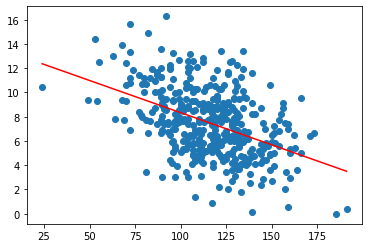

In [47]:
plt.scatter(X.Price, y)
xx = np.linspace(X.Price.min(), X.Price.max(), 1000)
yy = lm1.coef_[1] * xx + lm1.intercept_
plt.plot(xx, yy, "r-")

In [48]:
# wartosci dopasowane = y_hat -> y wyznaczone przez model 
# y_hat = lm1_intercept_ + lm1.coef_[1]*Price

In [51]:
y_pred = lm1.predict(X) # y_hat

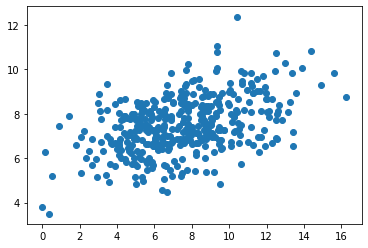

In [53]:
plt.scatter(y, y_pred) # powinien byc skupiony na prostej y = x

Wniosek: Model zle dopasowany - szukamy dalej!

In [ ]:
#b

In [56]:
X2 = sm.add_constant(carseats.data[['Price', 'Advertising']], prepend=True, has_constant='skip')

/opt/anaconda3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [57]:
lm2 = LinearRegression()
lm2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lm2.score(X2, y)

0.28185560334302273

In [ ]:
# c)

In [61]:
?LinearRegression

In [70]:
X_full = carseats.data
X_full = X_full.drop(['Sales'], axis=1)
X_full = sm.add_constant(X_full,  prepend=True, has_constant='skip')
X_full.head()

/opt/anaconda3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1.0,141,64,3,340,128,Bad,38,13,Yes,No


In [72]:
X_full = pd.get_dummies(X_full)

In [73]:
lm3 = LinearRegression()
lm3.fit(X_full, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
lm3.score(X_full, y)

0.8734133434127014

In [76]:
y_pred3 = lm3.predict(X_full)

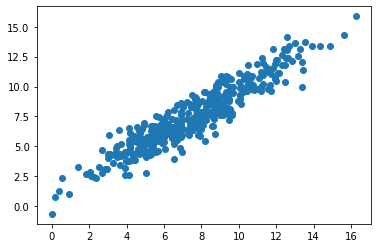

In [77]:
plt.scatter(y, y_pred3) # powinien byc skupiony na prostej y = x

In [ ]:
# d)
#  y = b0 + b1 * price + b2 * price^2

In [78]:
?PolynomialFeatures

In [79]:
poly2 = PolynomialFeatures(degree=2)

In [86]:
XPrice = np.array(carseats.data.Price).reshape(-1, 1)

In [90]:
price2 = poly2.fit_transform(XPrice) # kolumna 1, price, price^2
price2 # zmienne niezalezne + stala

array([[1.0000e+00, 1.2000e+02, 1.4400e+04],
       [1.0000e+00, 8.3000e+01, 6.8890e+03],
       [1.0000e+00, 8.0000e+01, 6.4000e+03],
       ...,
       [1.0000e+00, 1.5900e+02, 2.5281e+04],
       [1.0000e+00, 9.5000e+01, 9.0250e+03],
       [1.0000e+00, 1.2000e+02, 1.4400e+04]])

In [91]:
lm4 = LinearRegression()

In [92]:
lm4.fit(X = price2, y=y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
lm4.coef_

array([ 0.0000000e+00, -6.4591343e-02,  5.0377893e-05])

In [94]:
lm4.intercept_

14.272018030033482

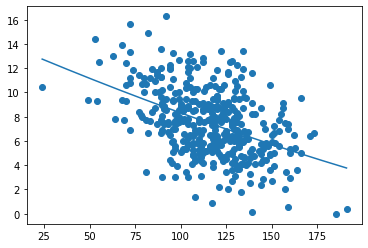

In [104]:
plt.scatter(carseats.data.Price, carseats.data.Sales)
yy2 = lm4.intercept_ + (lm4.coef_[1] * xx) + (lm4.coef_[2] * (xx ** 2)) # y = b0 + b1 * x + b2 * x^2
plt.plot(xx, yy2)

In [105]:
lm4.score(price2, y)

0.19822211624263839

### make_piplines

In [113]:
?make_pipeline

In [106]:
p1 = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

p1

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [107]:
p1.fit(X = XPrice, y = y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [108]:
p1.score(XPrice, y) # r2

0.19822211624263839

In [112]:
p1,coef_

NameError: name 'coef_' is not defined

In [109]:
p1['linearregression']

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
p1['linearregression'].coef_

array([ 0.0000000e+00, -6.4591343e-02,  5.0377893e-05])

In [111]:
p1['linearregression'].intercept_

14.272018030033482

In [ ]:
# e)

In [117]:
p2 = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)

p2.fit(XPrice, y)
p2.score(XPrice, y)

0.1989103959633406

# Wybór i ocena najlepszego modelu regresji

Podczas budowy modelu, którego celem jest przewidywanie pewnych wartości na podstawie zbioru danych uczących poważnym problemem jest ocena jakości uczenia i zdolności poprawnego przewidywania.

**Częstym błędem osób początkujących w zakresie analizy danych jest przeprowadzanie testów na tym samym zbiorze na którym system był uczony**. Takie rozwiązanie nie jest poprawnym miernikiem jakości nauczonego modelu i prowadzi do wyników które są przeszacowane, czyli nadmiernie optymistyczne.

Zwykle głównym celem budowy modeli predykcyjnych jest późniejsze wykorzystanie przewidywań modelu na danych niedostępnych podczas procesu uczenia więc opracowano szereg metod pozwalających na znacznie bardziej uczciwy pomiar dokładności.

### Podział zbioru na część:
- treningową,
- testową.

Idea oceny modelu lub doboru odpowiednich parametrów modelu sprowadza się wówczas do nauczenia modelu na części uczącej oraz przetestowania go na części testowej, która nie była wykorzystywana w procesie uczenia modelu. Dzięki wydzieleniu dwóch niezależnych podzbiorów, wektory części testowej zawierają informację o faktycznym wyniku jaki powinien zostać osiągnięty, natomiast nauczony (na części uczącej zbioru) model dostarcza wyników przewidywań.

lub 

- treningową,
- walidacyjną,
- testową.

Nierzadko, z wydzielenia próby walidacyjnej oraz testowej trzeba zrezygnować i wszystkie dane uznać za elementy próby uczącej. Jak wówczas porównywać różne modele?

Trzeba się odwołać do wielokrotnego wykorzystania elementów próby uczącej, tak przy tym zorganizowanego, by wprowadzane tym sposobem obciążenie otrzymywanych oszacowań było możliwie małe.

## Kroswalidacja - sprawdzanie krzyżowe

1. Próba ucząca zostaje podzielona na $K$ możliwie równych części.

2. Z próby uczącej tworzy się $K$ różnych pseudoprób, powstających przez usuwanie z próby oryginalnej jednej z jej $K$ części. Każda pseudopróba składa się $K-1$ części próby uczącej.

3. Dany model jest budowany $K$-krotnie, za każdym razem na podstawie innej pseudopróby.

4. Otrzymujemy $K$ wersji tego samego modelu.

5. Każda $k$-ta wersja modelu jest oceniana na tej części oryginalnej próby uczącej, która nie weszła do $k$-tej pseudopróby. Tym sposobem, oceny danej wersji modelu dokonujemy na obserwacjach, które nie brały udziałuw jego konstrukcji.

6. Oszacowanie błędu kroswalidacji wyznaczamy jako średnią z błędów każdej wersji modelu.

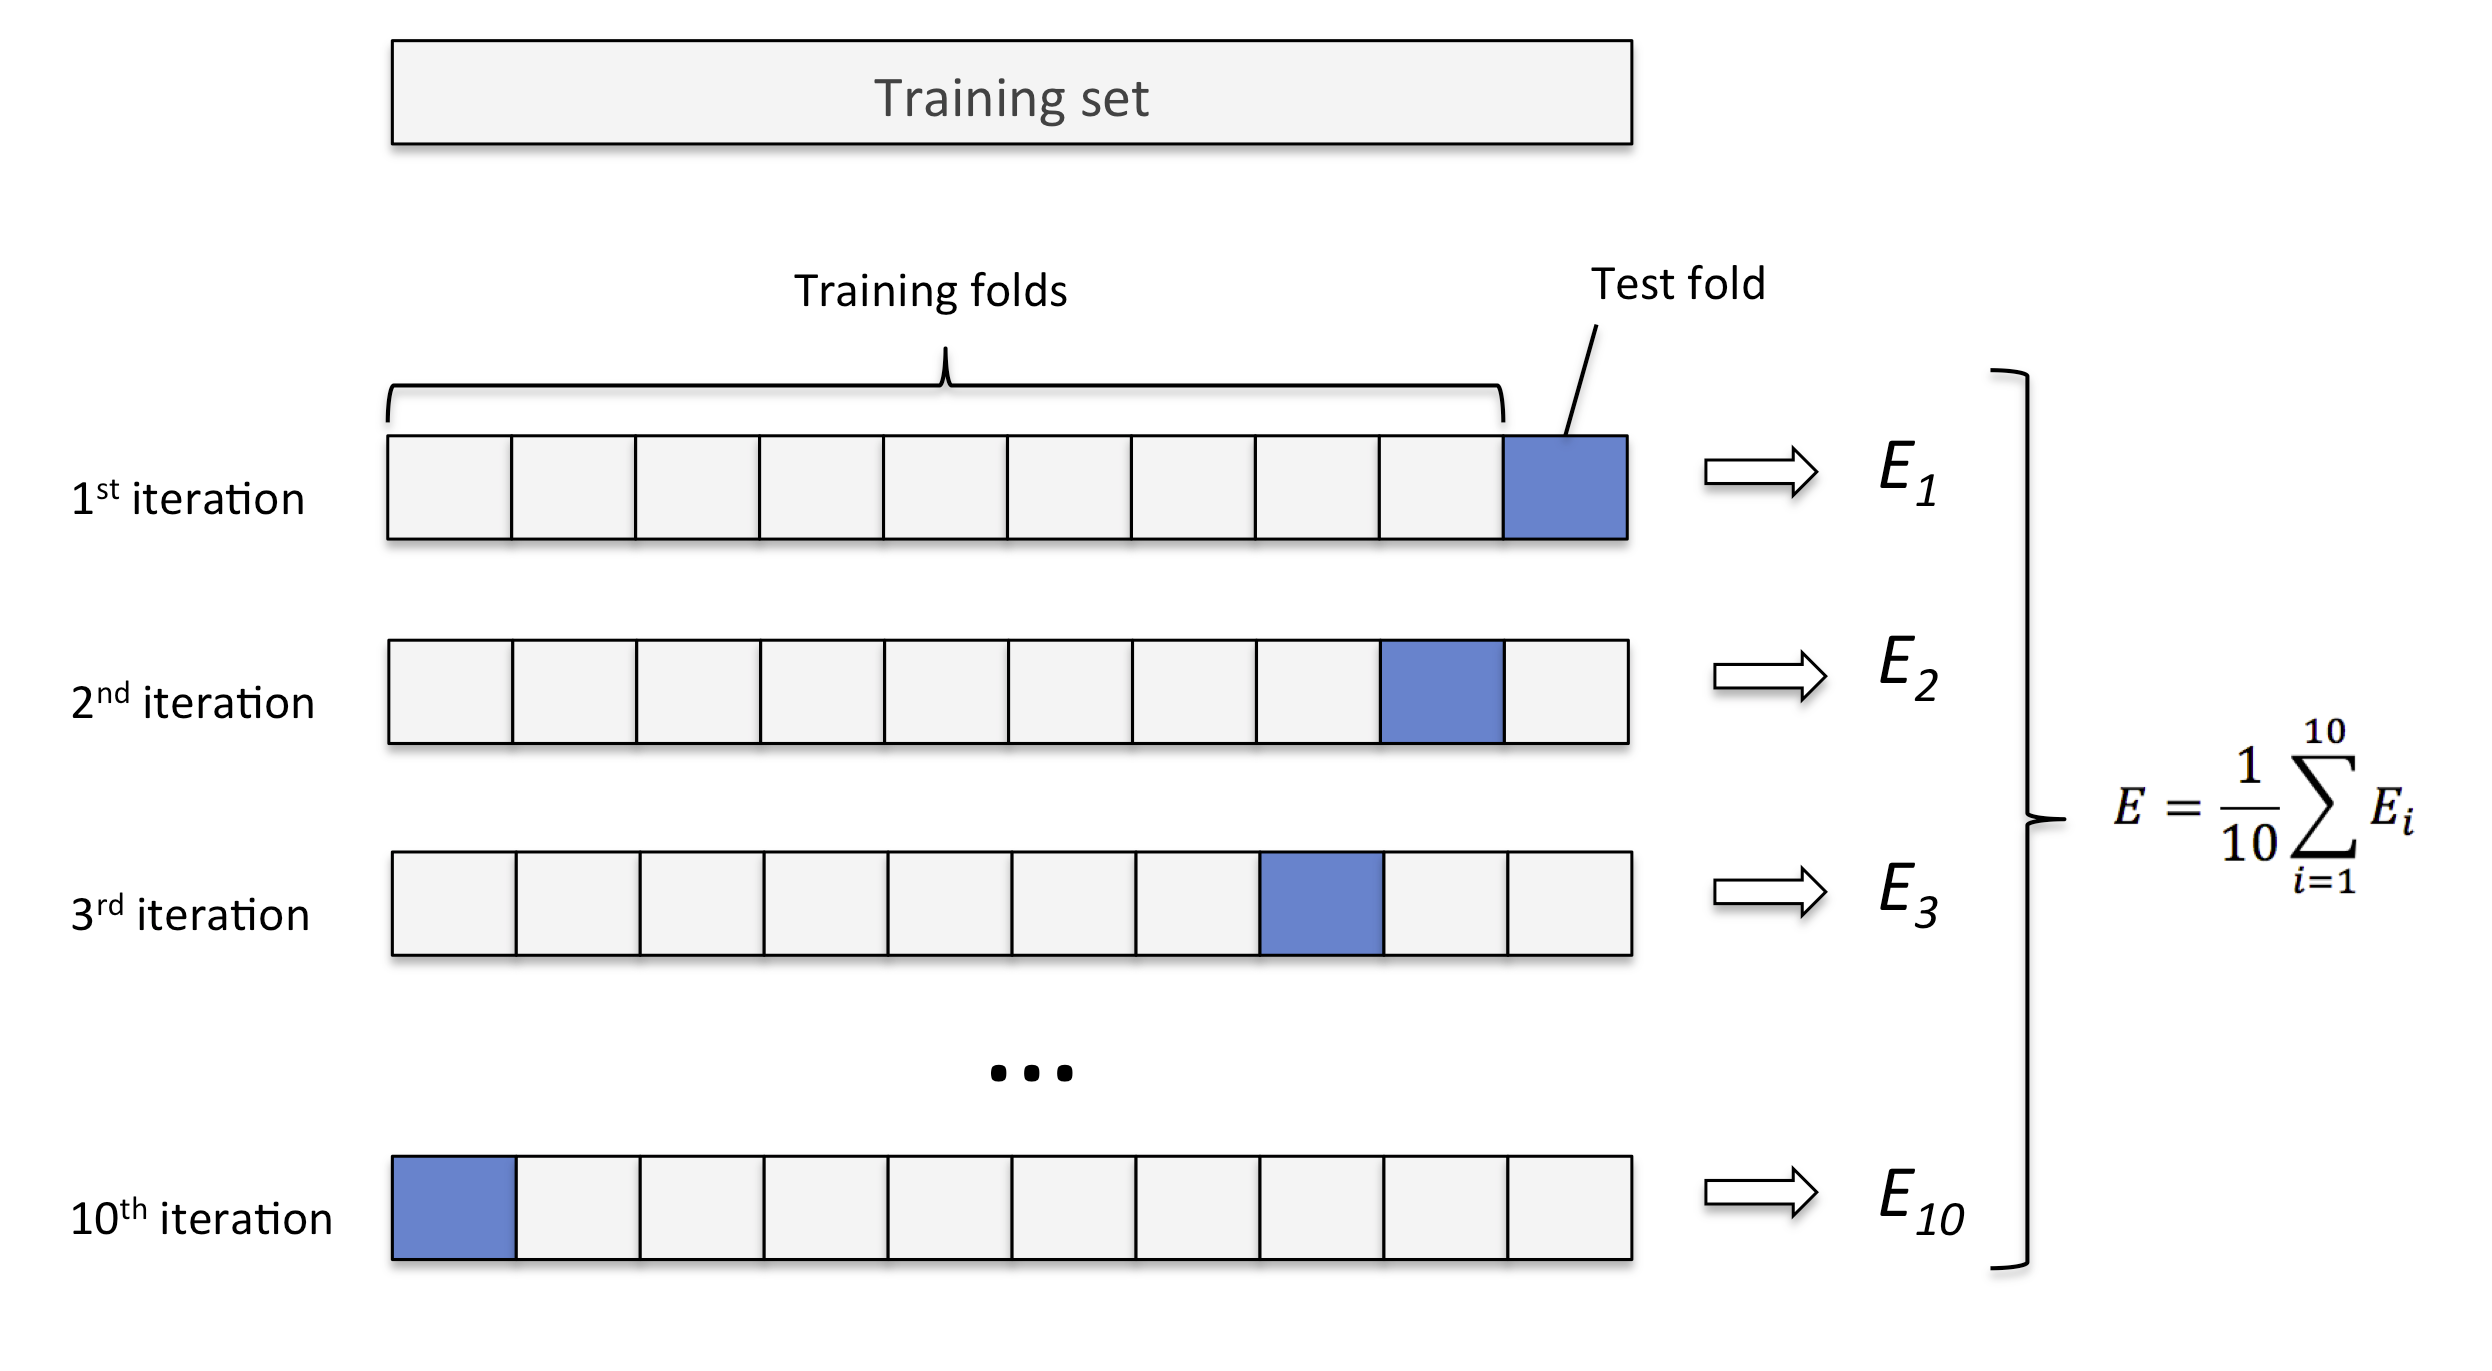
Źródło: karlrosaen.com/ml/learning-log/2016-06-20/

## Pomiary błędów

### Błąd średniokwadratowy (ang. *Mean squared error*)
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2.
$$

### Mediana błędu bezwzględnego (ang. *Median absolute error*)
$$
\text{MAE}= \text{Med}(|y_i - \hat{y}_i|).
$$

## Zadanie 2

Wczytaj zbiór `Carseats`, a następnie

1. Podziel zbiór na część treningową i testową w stosunku 7:3.

2. Naucz dowolny model na części treningowej: 
    - wyznacz błąd dopasowania wykorzystującz MSE i MAE;
    - wyznacz te same błędy wykorzystując metodę kroswalidacji.

3. Sprawdź jakość predykcji. Na podstawie nauczonego modelu na części treningowej, dokonaj predykcji wartość `Sales` dla wartości ze zbioru testowego. Porównaj jakość dopasowania z jakością predykcji.

In [126]:
from sklearn.model_selection import cross_val_score, train_test_split
import sklearn.metrics as metrics

In [122]:
# Podział zbioru na część treningową i na część testową
y = carseats.data.Sales
X = carseats.data.drop(['Sales'], axis=1)

X = sm.add_constant(X, prepend=True, has_constant='skip')
X = pd.get_dummies(X)

In [123]:
X

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1.0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,1.0,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,1.0,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,1.0,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,1.0,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,1.0,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,1.0,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,1.0,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [124]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [ ]:
# blad dopasowania - na zbiorze treningowym
# blad predykcji - na zbiorze testowy

In [127]:
?train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [130]:
print(X_train.shape[0] / X.shape[0], X_test.shape[0] / X.shape[0])

0.7 0.3


In [131]:
lm = LinearRegression()
lm.fit(X = X_train, y = y_train) # nauka na zbiorze treningowym!!!

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [136]:
print("Train R2: {}".format(np.round(lm.score(X_train, y_train), 2)))
print("Train MSE: {}".format(np.round(metrics.mean_squared_error(y_true=y_train, y_pred=lm.predict(X_train)), 2)))
print("Train MAE: {}".format(np.round(metrics.median_absolute_error(y_true=y_train, y_pred=lm.predict(X_train)), 2)))

Train R2: 0.89
Train MSE: 0.91
Train MAE: 0.66


In [134]:
metrics.mean_squared_error(y_true=y_train, y_pred=lm.predict(X_train))

0.9085503897084769

In [ ]:
metrics.mean_absolute_error(y_true=y_train, y_pred=lm.predict(X_train))

In [137]:
?cross_val_score

In [144]:
print("Train CV=10, R2: {}".format(cross_val_score(lm, X=X_train, y=y_train, scoring='r2', cv=10).mean()))
print("Train CV=10, MSE: {}".format(-cross_val_score(lm, X=X_train, y=y_train, 
                                                    scoring='neg_mean_squared_error', cv=10).mean()))
print("Train CV=10, MAE: {}".format(-cross_val_score(lm, X=X_train, y=y_train, 
                                                    scoring='neg_median_absolute_error', cv=10).mean()))

Train CV=10, R2: 0.8568232769725197
Train CV=10, MSE: 0.9989968367033868
Train CV=10, MAE: 0.7195929869586873


In [145]:
print("Test R2: {}".format(np.round(lm.score(X_test, y_test), 2)))
print("Test MSE: {}".format(np.round(metrics.mean_squared_error(y_true=y_test, y_pred=lm.predict(X_test)), 2)))
print("Test MAE: {}".format(np.round(metrics.median_absolute_error(y_true=y_test, y_pred=lm.predict(X_test)), 2)))

Test R2: 0.82
Test MSE: 1.31
Test MAE: 0.78


## Zadanie 3
Napisz własną funkcję do kroswalidacji (użyj `from sklearn.model_selection import KFold`).

In [139]:
from sklearn.model_selection import KFold

In [205]:
def cv_fun(model, X, y, cv, score_fun):
    pass

## Zadanie 4
Dla zbióru `Carseats`,

1. Podziel zbiór na część treningową i testową;

2. Dopasuj model regrresji:

a) liniowej `Sales~Price`;

b) liniowej `Sales~Price + Advertising`;

c) liniowej `Sales~.`;

d) wielomianowej stopnia 2 dla zmiennej `Price`;

e) wielomianowej stopnia 3 dla zmiennej `Price`;

3. Wybierz najlepszy model na podstawie miar jakości otrzymanych przy użyciu kroswalidacji 10-krotnej.

4. Dla najlepszego modelu dokonaj predykcji na zbiorze testowy. Wyznacz jakość predykcji.